<a href="https://colab.research.google.com/github/spyv22072000/Btecky/blob/main/salary_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download rkiattisak/salaly-prediction-for-beginer

Dataset URL: https://www.kaggle.com/datasets/rkiattisak/salaly-prediction-for-beginer
License(s): Attribution 4.0 International (CC BY 4.0)
  0% 0.00/3.20k [00:00<?, ?B/s]
100% 3.20k/3.20k [00:00<00:00, 7.79MB/s]


In [ ]:
import zipfile

zip_ref = zipfile.ZipFile('/content/salaly-prediction-for-beginer.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()


In [ ]:
import pandas as pd
df = pd.read_csv('/content/Salary Data.csv')
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [ ]:
df_copy=df.copy()
df_copy.head()


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


<Axes: xlabel='Education Level', ylabel='count'>

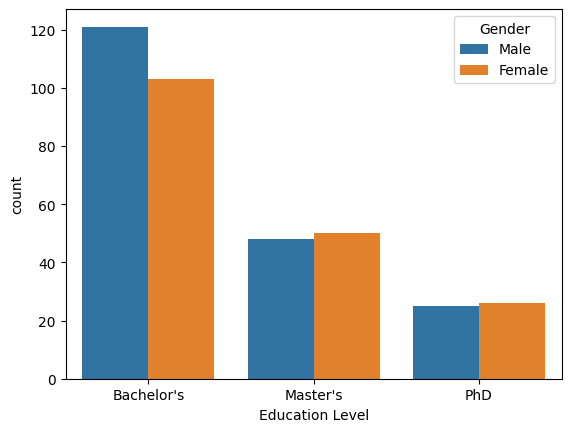

In [ ]:
import seaborn as sns
sns.countplot(x="Education Level", hue="Gender", data=df)



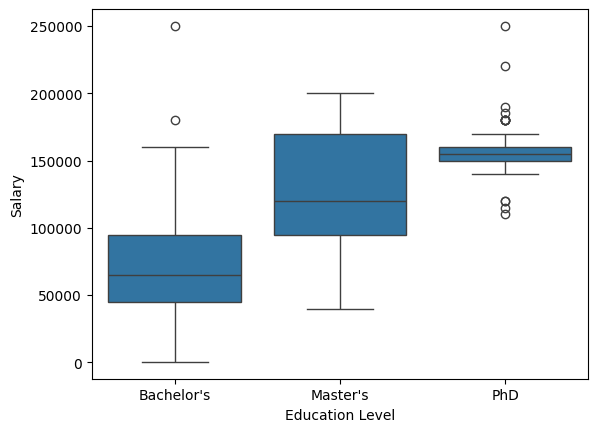

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x="Education Level", y="Salary", data=df)
plt.show()

<Axes: xlabel='Age', ylabel='Salary'>

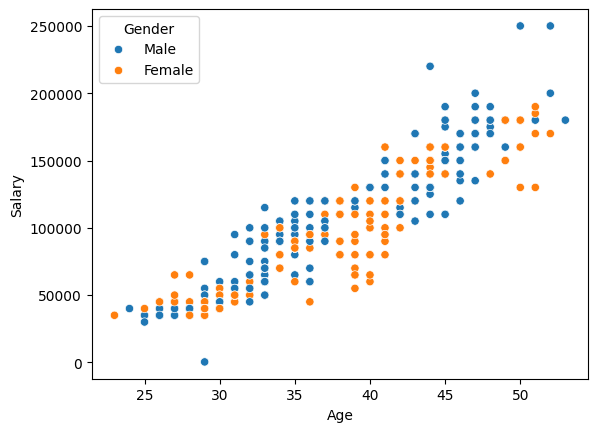

In [ ]:
sns.scatterplot(x="Age",y="Salary",hue="Gender",data=df)

<Axes: xlabel='Gender', ylabel='Age'>

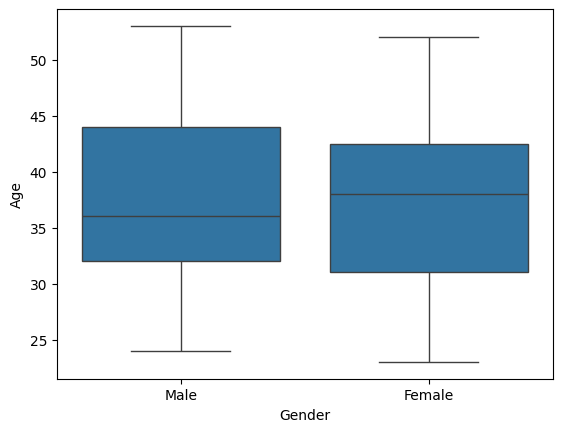

In [ ]:
sns.boxplot(x="Gender",y="Age",data=df)

In [ ]:
df.drop(columns="Job Title",inplace=True)

In [ ]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder(categories=[["Bachelor's", "Master's", "PhD"]],
                         handle_unknown='use_encoded_value',  # Change this to 'ignore'
                         unknown_value=-1)  # You can specify any integer for unknowns, but here it won't be used

# Fit and transform the 'Education Level' column
# This will ignore unknown values instead of encoding them
df["Education Level"] = encoder.fit_transform(df[["Education Level"]])

# Display the DataFrame
print(df.head())

In [ ]:
df.head()


,Age,Gender,Education Level,Years of Experience,Salary
0,32.0,Male,0.0,5.0,90000.0
1,28.0,Female,1.0,3.0,65000.0
2,45.0,Male,2.0,15.0,150000.0
3,36.0,Female,0.0,7.0,60000.0
4,52.0,Male,1.0,20.0,200000.0


In [ ]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder(categories=[["Male","Female"]],
                         handle_unknown='use_encoded_value',  # Change this to 'ignore'
                         unknown_value=-1)  # You can specify any integer for unknowns, but here it won't be used

# Fit and transform the 'Education Level' column
# This will ignore unknown values instead of encoding them
df["Gender"] = encoder.fit_transform(df[["Gender"]])

# Display the DataFrame
print(df.head())

    Age  Gender  Education Level  Years of Experience    Salary
0  32.0     0.0              0.0                  5.0   90000.0
1  28.0     1.0              1.0                  3.0   65000.0
2  45.0     0.0              2.0                 15.0  150000.0
3  36.0     1.0              0.0                  7.0   60000.0
4  52.0     0.0              1.0                 20.0  200000.0


In [ ]:
df.drop(columns="Gender",inplace=True)

In [ ]:
df.head()

,Age,Education Level,Years of Experience,Salary
0,32.0,0.0,5.0,90000.0
1,28.0,1.0,3.0,65000.0
2,45.0,2.0,15.0,150000.0
3,36.0,0.0,7.0,60000.0
4,52.0,1.0,20.0,200000.0


In [ ]:
df = pd.concat([df, df_copy[['Gender']]], axis=1)

In [ ]:
df.head()

,Age,Education Level,Years of Experience,Salary,Gender
0,32.0,0.0,5.0,90000.0,Male
1,28.0,1.0,3.0,65000.0,Female
2,45.0,2.0,15.0,150000.0,Male
3,36.0,0.0,7.0,60000.0,Female
4,52.0,1.0,20.0,200000.0,Male


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
transformer = ColumnTransformer(
    [('one_hot_encoder', OneHotEncoder(drop='first'), ["Gender"])],
    remainder='passthrough'
)

# Apply transformation
transformed_data = transformer.fit_transform(df)

# Retrieve feature names from the transformer
new_columns = transformer.get_feature_names_out()

# Convert transformed data back to a DataFrame
transformed_df = pd.DataFrame(transformed_data, columns=new_columns)

print(transformed_df)

     one_hot_encoder__Gender_Male  one_hot_encoder__Gender_nan  \
0                             1.0                          0.0   
1                             0.0                          0.0   
2                             1.0                          0.0   
3                             0.0                          0.0   
4                             1.0                          0.0   
..                            ...                          ...   
370                           0.0                          0.0   
371                           1.0                          0.0   
372                           0.0                          0.0   
373                           1.0                          0.0   
374                           0.0                          0.0   

     remainder__Age  remainder__Education Level  \
0              32.0                         0.0   
1              28.0                         1.0   
2              45.0                         2.0   
3  

In [ ]:
transformed_df

,one_hot_encoder__Gender_Male,one_hot_encoder__Gender_nan,remainder__Age,remainder__Education Level,remainder__Years of Experience,remainder__Salary
0,1.0,0.0,32.0,0.0,5.0,90000.0
1,0.0,0.0,28.0,1.0,3.0,65000.0
2,1.0,0.0,45.0,2.0,15.0,150000.0
3,0.0,0.0,36.0,0.0,7.0,60000.0
4,1.0,0.0,52.0,1.0,20.0,200000.0
...,...,...,...,...,...,...
370,0.0,0.0,35.0,0.0,8.0,85000.0
371,1.0,0.0,43.0,1.0,19.0,170000.0
372,0.0,0.0,29.0,0.0,2.0,40000.0
373,1.0,0.0,34.0,0.0,7.0,90000.0


In [ ]:
from sklearn.model_selection import train_test_split
X = transformed_df.drop(columns="remainder__Salary")
y = transformed_df["remainder__Salary"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.dropna(inplace=True)
y_train.dropna(inplace=True)
X_test.dropna(inplace=True)
y_test.dropna(inplace=True)



In [ ]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = reg.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error # Import all necessary functions


print('r2_score',r2_score(y_test,y_pred))
print('mean_absolute_error',mean_absolute_error(y_test,y_pred))
print('mean_squared_error',mean_squared_error(y_test,y_pred))

r2_score 0.9017317245349319
mean_absolute_error 10612.204944787913
mean_squared_error 241270509.49100578
